1. Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

2. Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

3. Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

4. Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5. Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Ahmet/Desktop/data/states_all.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [10]:
columns = ['TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
for i in columns:
    df[i].fillna(df[i].mean(),inplace=True)
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          491
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       0
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64

In [32]:
df["avg_score_4"] = (df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"]) * (df["GRADES_4_G"]/(df["GRADES_4_G"]+ df["GRADES_8_G"]))
df["avg_score_8"] = (df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"]) * (df["GRADES_8_G"]/(df["GRADES_4_G"]+ df["GRADES_8_G"]))
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_score_4,avg_score_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,421556.80274,270678.50137,731634.0,208.0,252.0,207.0,262.960965,207.362231,257.651436
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,421556.80274,270678.50137,122487.0,211.5,258.5,208.0,262.960965,220.601284,247.241756
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,421556.80274,270678.50137,673477.0,215.0,265.0,209.0,262.960965,224.884628,247.936660
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,421556.80274,270678.50137,441490.0,210.0,256.0,211.0,262.960965,206.390895,264.545720
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,421556.80274,270678.50137,5254844.0,208.0,261.0,202.0,262.960965,219.455427,243.507117


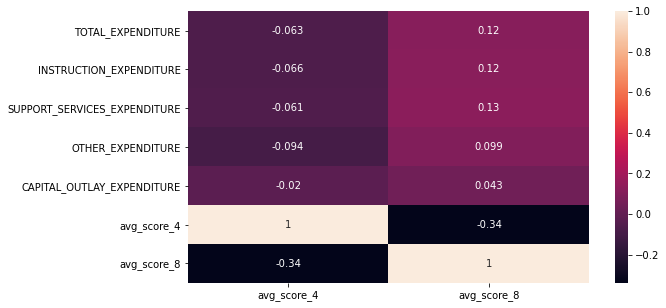

In [31]:
plt.figure(figsize=(9,5))
sns.heatmap(df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE',"avg_score_4","avg_score_8"]].corr()[["avg_score_4","avg_score_8"]],annot=True)
plt.show()

While the expenditure variable with the highest correlation value for fourth graders is other expenditures, it is support service expenditures for eighth graders. While the correlation for fourth graders is negative, for eighth graders the correlation is positive.

In [59]:
exp = df[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]

X = StandardScaler().fit_transform(exp)
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)
value=0
print("Cumulative Eplained Variance Ratio")
for i in sklearn_pca.explained_variance_ratio_:
    value += i
    print(value)

Cumulative Eplained Variance Ratio
0.9453270961836258
0.9760399740566311
0.9966203054926368
1.0


In [64]:
pca_new = pd.DataFrame(Y_sklearn,columns=["PC1","PC2","PC3","PC4"])
df = pd.concat([df,pca_new],axis=1)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,PC3,PC4,PC1,PC2,PC3,PC4,PC1,PC2,PC3,PC4
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,-0.381540,0.148377,-0.698275,-0.057240,-0.381540,0.148377,-0.698275,-0.057240,-0.381540,0.148377
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,-0.503010,0.154395,-0.906993,-0.019845,-0.503010,0.154395,-0.906993,-0.019845,-0.503010,0.154395
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,-0.245421,0.071933,-0.472802,0.212908,-0.245421,0.071933,-0.472802,0.212908,-0.245421,0.071933
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,-0.432323,0.164425,-0.798194,-0.002935,-0.432323,0.164425,-0.798194,-0.002935,-0.432323,0.164425
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,1.259500,-0.652023,2.531245,-0.791289,1.259500,-0.652023,2.531245,-0.791289,1.259500,-0.652023


In [65]:
df[["avg_score_4","avg_score_8","PC1"]].corr()

,avg_score_4,avg_score_8,PC1,PC1,PC1
avg_score_4,1.000000,-0.339077,-0.062432,-0.062432,-0.062432
avg_score_8,-0.339077,1.000000,0.101373,0.101373,0.101373
PC1,-0.062432,0.101373,1.000000,1.000000,1.000000
PC1,-0.062432,0.101373,1.000000,1.000000,1.000000
PC1,-0.062432,0.101373,1.000000,1.000000,1.000000


5. I would prefer it because the first variable explains most of the variance. It would be more efficient for us to give up only 5 percent and reduce 4 dimensions to one dimension.